In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
import seaborn as sb
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import learning_curve

from sklearn.compose import make_column_selector as selector #Para seleccionar de forma automática las variables numéricas y categóricas
from sklearn.preprocessing import OneHotEncoder #Para codificar las variables categóricas usando dummies
from sklearn.preprocessing import StandardScaler #Para normalizar las variables numéricas
from sklearn.compose import ColumnTransformer #Modifica las columnas usando los preprocesadores
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline #Planifica una secuencia de procesos
from sklearn import set_config #Para mostrar graficamente el pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import learning_curve

set_config(display='diagram')
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [3]:
houses = pd.read_csv('train.csv')
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(houses.drop(['Id', 'SalePrice'], axis=1))
categorical_columns = categorical_columns_selector(houses)

print(numerical_columns)
print(categorical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCon

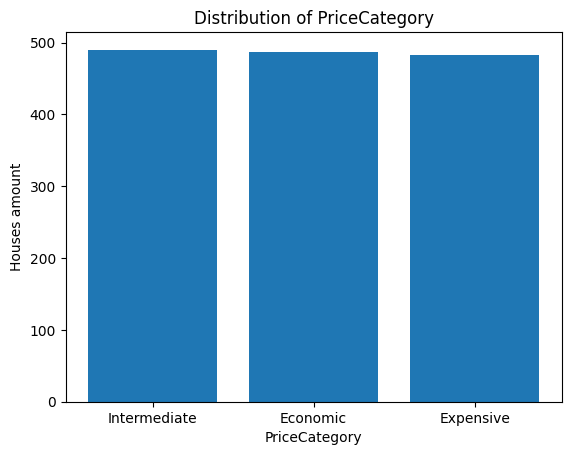

In [11]:
# Define the category names
categories = ['Economic', 'Intermediate', 'Expensive']

# Create a new column in the DataFrame for the categories
houses['PriceCategory'] = pd.qcut(houses['SalePrice'], q=len(categories), labels=categories)

# Verificar la distribución de las categorías
plt.bar(houses['PriceCategory'].value_counts().index, houses['PriceCategory'].value_counts().values)
plt.xlabel('PriceCategory')
plt.ylabel('Houses amount')
plt.title('Distribution of PriceCategory')
plt.show()

In [13]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
num_preprocessor = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

In [16]:
preprocessor = ColumnTransformer([
    ('Categorial columns',categorical_preprocessor, categorical_columns),
    ('Numerical columns',num_preprocessor, numerical_columns)
], remainder="passthrough")

In [17]:
model = make_pipeline(
  preprocessor,
  MLPClassifier(
    activation="relu",
    verbose=True,
    hidden_layer_sizes=(30, 20),
    max_iter=500
  )
)
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Categorial columns',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exte...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(30, 20), max_iter=500,
                               verbose=True))])

In [19]:
target = houses.pop('PriceCategory')
data = houses.drop(['Id', 'SalePrice'], axis=1)

In [20]:
random.seed(123)
data_train, data_test, target_train, target_test = train_test_split(data, target,test_size=0.3,train_size=0.7)
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

In [21]:
model.fit(data_train,target_train)

Iteration 1, loss = 1.06873176
Iteration 2, loss = 0.96081285
Iteration 3, loss = 0.86611492
Iteration 4, loss = 0.77586243
Iteration 5, loss = 0.69691919
Iteration 6, loss = 0.62808144
Iteration 7, loss = 0.57090404
Iteration 8, loss = 0.52312750
Iteration 9, loss = 0.48214123
Iteration 10, loss = 0.44853857
Iteration 11, loss = 0.42046639
Iteration 12, loss = 0.39868612
Iteration 13, loss = 0.37885441
Iteration 14, loss = 0.36046953
Iteration 15, loss = 0.34352792
Iteration 16, loss = 0.33370591
Iteration 17, loss = 0.31995579
Iteration 18, loss = 0.31055816
Iteration 19, loss = 0.30237995
Iteration 20, loss = 0.29240694
Iteration 21, loss = 0.28630760
Iteration 22, loss = 0.27679145
Iteration 23, loss = 0.26996708
Iteration 24, loss = 0.26186925
Iteration 25, loss = 0.25971998
Iteration 26, loss = 0.24893623
Iteration 27, loss = 0.24830246
Iteration 28, loss = 0.23764475
Iteration 29, loss = 0.23475239
Iteration 30, loss = 0.22765482
Iteration 31, loss = 0.22177339
Iteration 32, los

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Categorial columns',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exte...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(30, 20), max_iter=500,
                               verbose=True))])

In [22]:
pred = model.predict(data_test)

Accuracy: 0.829
Precision: 0.829
recall: 0.829


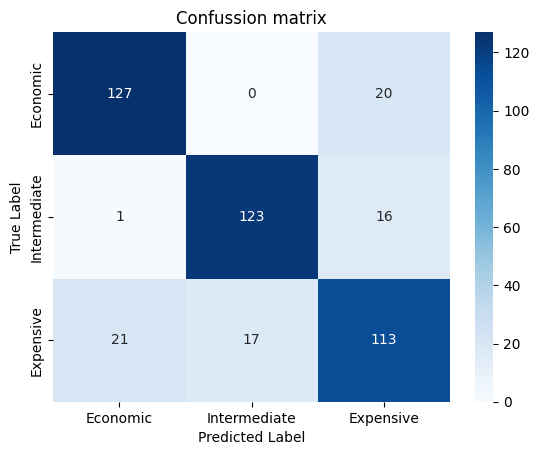

In [28]:
cm = confusion_matrix(target_test,pred)
accuracy = accuracy_score(target_test,pred)
precision = precision_score(target_test,pred,average='micro')
recall =  recall_score(target_test,pred,average='micro')
f1 = f1_score(target_test,pred,average='micro')
print(f'Accuracy: {round(accuracy, 3)}')
print(f'Precision: {round(precision, 3)}')
print(f'recall: {round(recall, 3)}')
sb.heatmap(
  cm,
  annot=True,
  cmap="Blues",
  fmt="d",
  xticklabels=['Economic', 'Intermediate', 'Expensive'],
  yticklabels=['Economic', 'Intermediate', 'Expensive']
)
plt.title('Confussion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [29]:
model1 = make_pipeline(preprocessor,MLPClassifier(activation="identity",verbose=True,hidden_layer_sizes=(), max_iter=300))
model1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Categorial columns',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exte...
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='identity', hidden_layer_sizes=(),
                               max_iter=300, verbose=True))])

In [30]:
model1.fit(data_train,target_train)

Iteration 1, loss = 0.99796879
Iteration 2, loss = 0.90682169
Iteration 3, loss = 0.84729658
Iteration 4, loss = 0.79803561
Iteration 5, loss = 0.75423199
Iteration 6, loss = 0.71649531
Iteration 7, loss = 0.68585791
Iteration 8, loss = 0.66063429
Iteration 9, loss = 0.63886699
Iteration 10, loss = 0.61976365
Iteration 11, loss = 0.60143681
Iteration 12, loss = 0.58524398
Iteration 13, loss = 0.57188950
Iteration 14, loss = 0.55951732
Iteration 15, loss = 0.54832807
Iteration 16, loss = 0.53832144
Iteration 17, loss = 0.52834996
Iteration 18, loss = 0.52006986
Iteration 19, loss = 0.51232533
Iteration 20, loss = 0.50540096
Iteration 21, loss = 0.49815479
Iteration 22, loss = 0.49146832
Iteration 23, loss = 0.48594449
Iteration 24, loss = 0.48104507
Iteration 25, loss = 0.47520078
Iteration 26, loss = 0.46972774
Iteration 27, loss = 0.46514431
Iteration 28, loss = 0.45990206
Iteration 29, loss = 0.45530130
Iteration 30, loss = 0.45091127
Iteration 31, loss = 0.44638954
Iteration 32, los

C:\Users\dellg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Categorial columns',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exte...
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='identity', hidden_layer_sizes=(),
                               max_iter=300, verbose=True))])

In [31]:
pred1 = model1.predict(data_test)

Accuracy: 0.79
Precision: 0.79
recall: 0.79


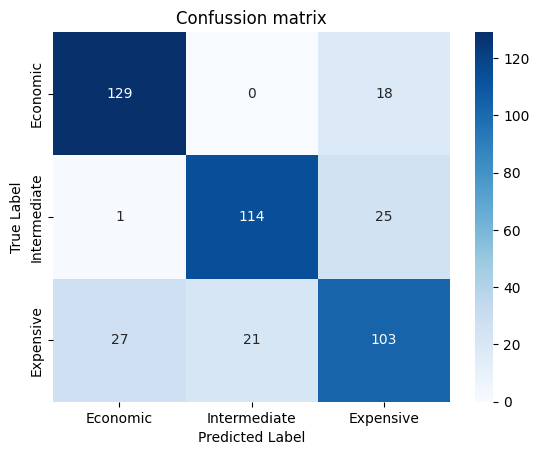

In [32]:
cm = confusion_matrix(target_test,pred1)
accuracy=accuracy_score(target_test,pred1)
precision =precision_score(target_test,pred1,average='micro')
recall =  recall_score(target_test,pred1,average='micro')
f1 = f1_score(target_test,pred1,average='micro')

print(f'Accuracy: {round(accuracy, 3)}')
print(f'Precision: {round(precision, 3)}')
print(f'recall: {round(recall, 3)}')
sb.heatmap(
  cm,
  annot=True,
  cmap="Blues",
  fmt="d",
  xticklabels=['Economic', 'Intermediate', 'Expensive'],
  yticklabels=['Economic', 'Intermediate', 'Expensive']
)
plt.title('Confussion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [33]:
parametros_tun  = param_grid = {
  'mlpclassifier__max_iter': (100,200,500,1000),
  'mlpclassifier__learning_rate_init': (0.01, 0.001, 1,10),
  'mlpclassifier__hidden_layer_sizes':((30,20),(50,30),(10,20))
}
model_grid_search = GridSearchCV(model1, param_grid=parametros_tun, n_jobs=2, cv=10) # two processors(n_jobs), & 10 k-folds
model_grid_search.fit(data_train, target_train)

Iteration 1, loss = 1.24013396
Iteration 2, loss = 0.98481151
Iteration 3, loss = 0.82644561
Iteration 4, loss = 0.71634568
Iteration 5, loss = 0.63845890
Iteration 6, loss = 0.58142376
Iteration 7, loss = 0.53884745
Iteration 8, loss = 0.50983540
Iteration 9, loss = 0.48361309
Iteration 10, loss = 0.46562109
Iteration 11, loss = 0.44741048
Iteration 12, loss = 0.43191251
Iteration 13, loss = 0.42016751
Iteration 14, loss = 0.40788937
Iteration 15, loss = 0.40163235
Iteration 16, loss = 0.39622804
Iteration 17, loss = 0.38605221
Iteration 18, loss = 0.38015293
Iteration 19, loss = 0.37613437
Iteration 20, loss = 0.36532531
Iteration 21, loss = 0.36090672
Iteration 22, loss = 0.35524999
Iteration 23, loss = 0.35200423
Iteration 24, loss = 0.35027712
Iteration 25, loss = 0.34294770
Iteration 26, loss = 0.33776416
Iteration 27, loss = 0.33753017
Iteration 28, loss = 0.33635491
Iteration 29, loss = 0.33071879
Iteration 30, loss = 0.32539827
Iteration 31, loss = 0.32205666
Iteration 32, los

C:\Users\dellg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Categorial '
                                                                         'columns',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['MSZoning',
                                                                          'Street',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'Utilities',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'Condition2',
                                                                          'BldgType',
                                                                          'HouseStyle',
                                                                          'RoofStyle'...
                                                                          'GarageArea',
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch', ...])])),
                                       ('mlpclassifier',
                                        MLPClassifier(activation='identity',
                                                      hidden_layer_sizes=(),
                                                      max_iter=300,
                                                      verbose=True))]),
             n_jobs=2,
             param_grid={'mlpclassifier__hidden_layer_sizes': ((30, 20),
                                                               (50, 30),
                                                               (10, 20)),
                         'mlpclassifier__learning_rate_init': (0.01, 0.001, 1,
                                                               10),
                         'mlpclassifier__max_iter': (100, 200, 500, 1000)})

In [34]:
model_grid_search.best_params_

{'mlpclassifier__hidden_layer_sizes': (10, 20),
 'mlpclassifier__learning_rate_init': 0.001,
 'mlpclassifier__max_iter': 100}

In [35]:
pred = model_grid_search.predict(data_test)

Accuracy: 0.799
Precision: 0.799
recall: 0.799


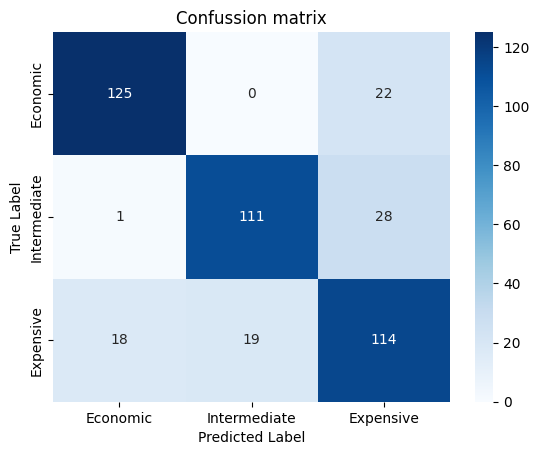

In [36]:
cm = confusion_matrix(target_test,pred)
accuracy=accuracy_score(target_test,pred)
precision =precision_score(target_test,pred,average='micro')
recall =  recall_score(target_test,pred,average='micro')
f1 = f1_score(target_test,pred,average='micro')

print(f'Accuracy: {round(accuracy, 3)}')
print(f'Precision: {round(precision, 3)}')
print(f'recall: {round(recall, 3)}')
sb.heatmap(
  cm,
  annot=True,
  cmap="Blues",
  fmt="d",
  xticklabels=['Economic', 'Intermediate', 'Expensive'],
  yticklabels=['Economic', 'Intermediate', 'Expensive']
)
plt.title('Confussion matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Obtaining SalePrice

In [15]:
houses = pd.read_csv('train.csv')
y = houses.pop("SalePrice")
X = houses
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [38]:
categorical_preprocessor = Pipeline(steps=[("encoder", OneHotEncoder(handle_unknown="ignore")), ("imputer", SimpleImputer(strategy="median"))])
num_preprocessor = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])

In [40]:
preprocessor = ColumnTransformer([
  ('Variables Categóricas',categorical_preprocessor, categorical_columns),
  ('Variables Numéricas',num_preprocessor, numerical_columns)
], remainder="passthrough")

In [16]:
random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [42]:
y_train

841     157500
878     148000
1412     90000
999     206000
638      85000
         ...  
1302    290000
67      226000
200     140000
1456    210000
584     133000
Name: SalePrice, Length: 1021, dtype: int64

In [44]:
model = make_pipeline(preprocessor, MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, max_iter=350, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   '...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=350))])

Fit model

In [45]:
model.fit(X_train, y_train)

C:\Users\dellg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   '...
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=350))])

In [46]:
pred1 = model.predict(X_test)

In [48]:
mse = mean_squared_error(y_test, pred1)
print(f"MSE (test): {round(mse, 3)}")
mae_test = mean_absolute_error(y_test, pred1)
print(f"MAE (test): {round(mae_test, 3)}")
rmse_test = np.sqrt(mse)
print(f"RMSE (test): {round(rmse_test, 3)}")

MSE (test): 1740102920.119
MAE (test): 23523.946
RMSE (test): 41714.541


In [49]:
modelBetter = make_pipeline(preprocessor, MLPRegressor(hidden_layer_sizes=(150, 70), activation='relu', solver='adam', alpha=0.000001, batch_size='auto', learning_rate='constant', learning_rate_init=0.01, max_iter=350, shuffle=True, random_state=None, tol=0.0001, verbose=True, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.5, beta_2=0.999, epsilon=1e-12, n_iter_no_change=20))

In [50]:
modelBetter.fit(X_train, y_train)

Iteration 1, loss = 19553114314.64188385
Iteration 2, loss = 18901730800.35139084
Iteration 3, loss = 15821400936.57841301
Iteration 4, loss = 10114414874.61103439
Iteration 5, loss = 6933074567.72692680
Iteration 6, loss = 6670136820.37069130
Iteration 7, loss = 6548890995.05735111
Iteration 8, loss = 6429236098.55772495
Iteration 9, loss = 6291072433.57042313
Iteration 10, loss = 6111179960.80286312
Iteration 11, loss = 5915404997.66331005
Iteration 12, loss = 5682584039.04984188
Iteration 13, loss = 5573467549.97623158
Iteration 14, loss = 5163681996.93562412
Iteration 15, loss = 4967806747.48882008
Iteration 16, loss = 4555972900.65242481
Iteration 17, loss = 4111297864.43547726
Iteration 18, loss = 3669661935.44529724
Iteration 19, loss = 3102538342.86107683
Iteration 20, loss = 2576744943.63245869
Iteration 21, loss = 2060802560.89790249
Iteration 22, loss = 1670228707.51110244
Iteration 23, loss = 1322696986.01026702
Iteration 24, loss = 1074983831.61840868
Iteration 25, loss = 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Variables Categóricas',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   '...
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpregressor',
                 MLPRegressor(alpha=1e-06, beta_1=0.5, epsilon=1e-12,
                              hidden_layer_sizes=(150, 70),
                              learning_rate_init=0.01, max_iter=350,
                              n_iter_no_change=20, verbose=True))])

In [51]:
predBetter = modelBetter.predict(X_test)

In [52]:
mse = mean_squared_error(y_test, predBetter)
print(f"MSE (test): {round(mse, 3)}")
mae_test = mean_absolute_error(y_test, predBetter)
print(f"MAE (test): {round(mae_test, 3)}")
rmse_test = np.sqrt(mse)
print(f"RMSE (test): {round(rmse_test, 3)}")

MSE (test): 1995184192.925
MAE (test): 17179.332
RMSE (test): 44667.485


C:\Users\dellg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dellg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dellg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dellg\A

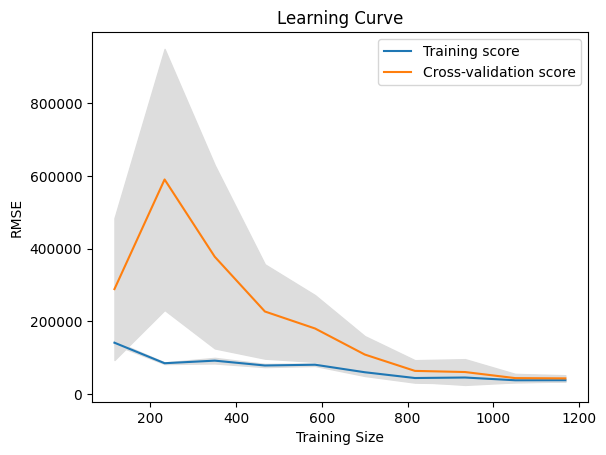

In [53]:
# Create a function to calculate RMSE
def rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

# Create a scorer
rmse_scorer = make_scorer(rmse, greater_is_better=False)
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes, cv=5, scoring=rmse_scorer)

# Calculate the means and standard deviations of the training and test scores
train_mean = np.mean(-train_scores, axis=1)
train_std = np.std(-train_scores, axis=1)
test_mean = np.mean(-test_scores, axis=1)
test_std = np.std(-test_scores, axis=1)

# Draw learning curves
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('RMSE')
plt.legend(loc='best')
plt.show()

# Modelo 2 SalePrice

In [12]:
model2 = make_pipeline(preprocessor, MLPRegressor(hidden_layer_sizes=(100, 50), activation='logistic', solver='adam', alpha=0.001, batch_size='auto', learning_rate='constant', learning_rate_init=0.0002, max_iter=500, shuffle=True, random_state=None, tol=0.0001, verbose=True, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-20, n_iter_no_change=10))
model2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Categorial columns',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MSZoning', 'Street',
                                                   'Alley', 'LotShape',
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exte...
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', ...])])),
                ('mlpregressor',
                 MLPRegressor(activation='logistic', alpha=0.001, epsilon=1e-20,
                              hidden_layer_sizes=(100, 50),
                              learning_rate_init=0.0002, max_iter=500,
                              verbose=True))])